In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, percentileofscore

In [2]:
data = pd.read_csv("/home/martingom04/Data-science/apoyo-desafio/Apoyo Desafio - Tabaquismo y gestación/baby.csv")
data.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [4]:
# Calculamos estadísticas descriptivas de los datos numéricos
data.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


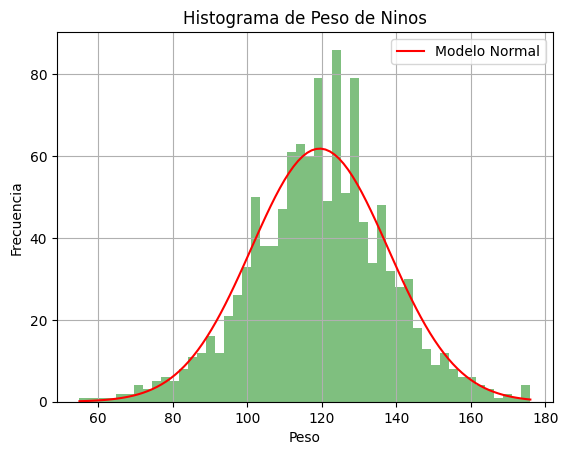

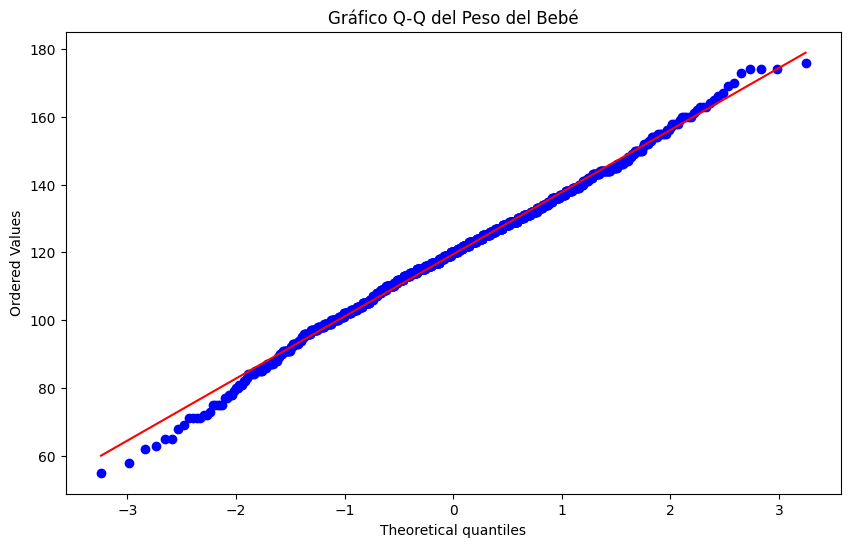

El histograma muestra que la distribución de los pesos de los bebés se ajusta en gran medida a una distribución normal, como se observa por la superposición de la curva roja.
El gráfico Q-Q complementa este análisis, mostrando que los pesos siguen la línea recta esperada para una distribución normal, confirmando que los pesos se distribuyen normalmente.
Sin embargo, si hubiera desviaciones significativas en el gráfico Q-Q o el histograma, indicarían que la distribución no es perfectamente normal.


In [8]:
# Tus datos de pesos
from scipy import stats


pesos = data['Birth.Weight']

# Calcular los parámetros de la distribución normal
mu = pesos.mean()
sigma = pesos.std()
minimo = pesos.min()
maximo = pesos.max()

# Generar la curva de la función de densidad de probabilidad (pdf)
x = np.linspace(minimo, maximo, 100)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Calcular el histograma
counts, bins, _ = plt.hist(pesos, bins=50, alpha=0.5, color='g', density=False)

# Ajustar el pdf a la escala del histograma
bin_width = bins[1] - bins[0]
pdf_scaled = pdf * len(pesos) * bin_width

# Graficar el pdf ajustado
plt.plot(x, pdf_scaled, 'r', label='Modelo Normal')

# Etiquetas y leyenda
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso de Ninos')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
stats.probplot(data['Birth.Weight'],dist = "norm", plot=plt)
plt.title('Gráfico Q-Q del Peso del Bebé')
plt.show()

print("El histograma muestra que la distribución de los pesos de los bebés se ajusta en gran medida a una distribución normal, como se observa por la superposición de la curva roja.")
print("El gráfico Q-Q complementa este análisis, mostrando que los pesos siguen la línea recta esperada para una distribución normal, confirmando que los pesos se distribuyen normalmente.")
print("Sin embargo, si hubiera desviaciones significativas en el gráfico Q-Q o el histograma, indicarían que la distribución no es perfectamente normal.")


In [18]:
#3.- Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5
#valores diferentes. Compara con los datos reales.

# Calculamos la media y desviación estándar de los pesos para modelar una distribución normal
media_peso = data['Birth.Weight'].mean()
std_peso = data['Birth.Weight'].std()

# Generamos 5 valores simulados usando la distribución normal
valores_modelo = np.random.normal(loc=media_peso, scale=std_peso, size=5)
valores_modelo = [int(num) for num in valores_modelo]
print("Valores generados por el modelo normal:", sorted(valores_modelo)) #los mostramos ordenados para comparar

# Extraemos los datos reales del dataset 
valores_reales = data['Birth.Weight'].sample(5).values
print("Valores reales del data para comparar: ", sorted(valores_reales)) #los mostramos ordenados para comparar

print("Depues de comparar los datos simulados en la distribucion normal con datos reales, podemos ver que todos los valores estan en el mismo rango, por lo que confirmamos nuevamente que los pesos de los bebés tienen una distribución normal ")

Valores generados por el modelo normal: [77, 98, 113, 113, 128]
Valores reales del data para comparar:  [np.int64(112), np.int64(113), np.int64(114), np.int64(120), np.int64(136)]
Depues de comparar los datos simulados en la distribucion normal con datos reales, podemos ver que todos los valores estan en el mismo rango, por lo que confirmamos nuevamente que los pesos de los bebés tienen una distribución normal 


Peso promedio de bebés de madres fumadoras: 113.82 g (Desviación estándar: 18.30)
Peso promedio de bebés de madres no fumadoras: 123.09 g (Desviación estándar: 17.42)


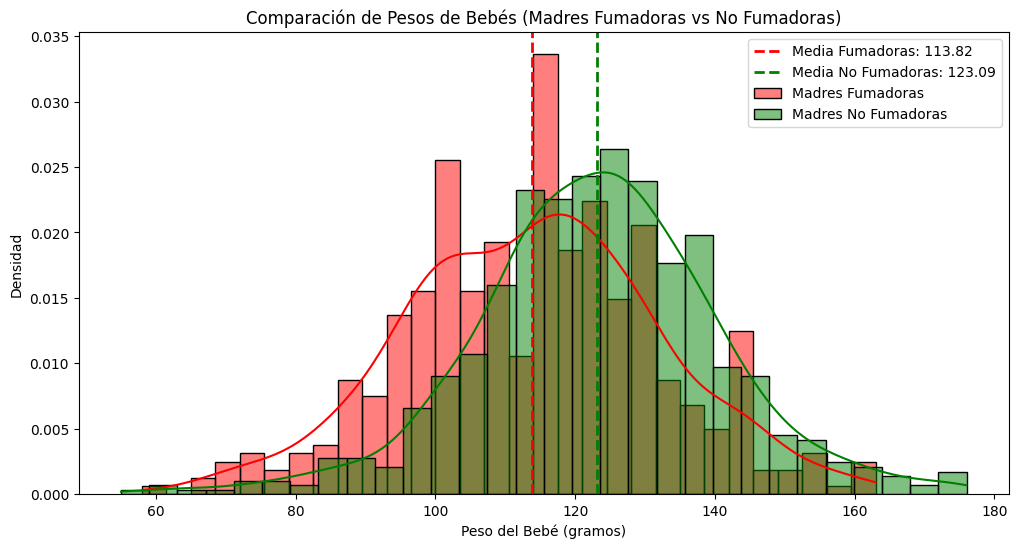

Estadístico t: -8.6265
Valor p: 0.0000
La diferencia en los pesos de los bebés de madres fumadoras y no fumadoras es estadísticamente significativa.


In [39]:
# 4 Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Quédiferencias existen? Explica y construye los modelos correspondientes.
# Separar los pesos según si la madre es fumadora o no
pesos_fumadoras = data[data['Maternal.Smoker'] == True]['Birth.Weight']
pesos_no_fumadoras = data[data['Maternal.Smoker'] == False]['Birth.Weight']

# Calcular estadísticas descriptivas
media_fumadoras = pesos_fumadoras.mean()
std_fumadoras = pesos_fumadoras.std()

media_no_fumadoras = pesos_no_fumadoras.mean()
std_no_fumadoras = pesos_no_fumadoras.std()

print(f"Peso promedio de bebés de madres fumadoras: {media_fumadoras:.2f} g (Desviación estándar: {std_fumadoras:.2f})")
print(f"Peso promedio de bebés de madres no fumadoras: {media_no_fumadoras:.2f} g (Desviación estándar: {std_no_fumadoras:.2f})")


# Graficar la distribución de los pesos
plt.figure(figsize=(12, 6))

# Histogramas y curvas de densidad
sns.histplot(pesos_fumadoras, kde=True, color='red', label='Madres Fumadoras', bins=30, stat="density")
sns.histplot(pesos_no_fumadoras, kde=True, color='green', label='Madres No Fumadoras', bins=30, stat="density")

# Líneas para indicar las medias
plt.axvline(x=media_fumadoras, color='red', linestyle='--', linewidth=2, label=f'Media Fumadoras: {media_fumadoras:.2f}')
plt.axvline(x=media_no_fumadoras, color='green', linestyle='--', linewidth=2, label=f'Media No Fumadoras: {media_no_fumadoras:.2f}')

# Configuración del gráfico
plt.title('Comparación de Pesos de Bebés (Madres Fumadoras vs No Fumadoras)')
plt.xlabel('Peso del Bebé (gramos)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


from scipy.stats import ttest_ind

# Realizar la prueba t de Student
t_stat, p_value = ttest_ind(pesos_fumadoras, pesos_no_fumadoras, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("La diferencia en los pesos de los bebés de madres fumadoras y no fumadoras es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar que la diferencia es estadísticamente significativa.")

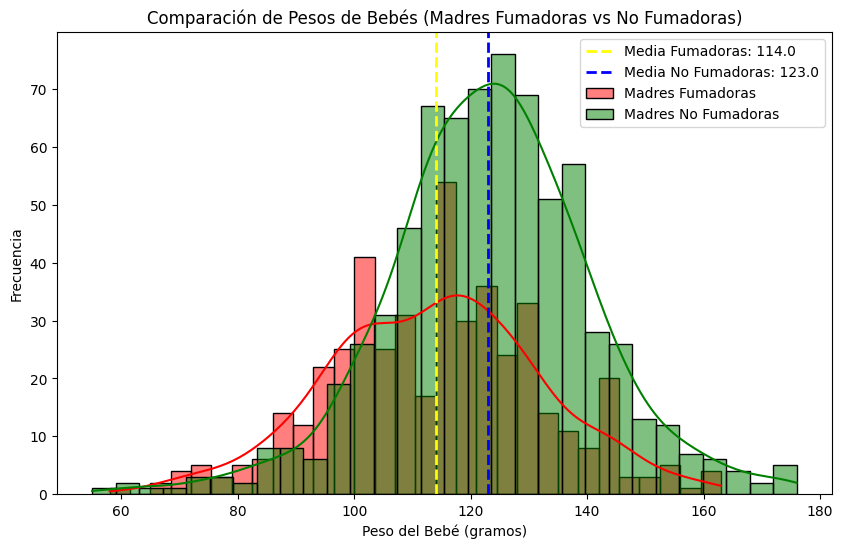

Media de peso (Madres Fumadoras) (Amarillo): 114.0
Desviación estándar de peso (Madres Fumadoras): 18.0
Media de peso (Madres No Fumadoras) (Azul): 123.0
Desviación estándar de peso (Madres No Fumadoras): 17.0

Resultados de la prueba t de Student:
Estadístico t: -8.6265
Valor p: 0.0000
La diferencia en los pesos de los bebés de madres fumadoras y no fumadoras es estadísticamente significativa.

Podemos concluir que el hábito de fumar afecta considerablemente el peso de los bebés.
Las madres fumadoras dan a luz a bebés con menor peso en promedio, mientras que las madres que no fuman dan a luz a bebés con mayor peso.
El peso promedio de los bebés de madres fumadoras es 114.0 g, mientras que el de madres no fumadoras es 123.0 g.
La diferencia en los pesos es significativa, como se confirma mediante la prueba t de Student, lo que indica que el hábito de fumar durante el embarazo tiene un impacto negativo en el peso del bebé al nacer.


In [41]:
#Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Quédiferencias existen? Explica y construye los modelos correspondientes.

# Separamos los pesos según si la madre es fumadora o no
pesos_fumadoras = data[data['Maternal.Smoker'] == True]['Birth.Weight']
pesos_no_fumadoras = data[data['Maternal.Smoker'] == False]['Birth.Weight']

# Calculamos las medias para comparar
media_fumadoras = pesos_fumadoras.mean().round()
media_no_fumadoras = pesos_no_fumadoras.mean().round()

# Calculamos la desviación estándar para ambos grupos
std_fumadoras = pesos_fumadoras.std().round()
std_no_fumadoras = pesos_no_fumadoras.std().round()

# Graficamos la comparación de las distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(pesos_fumadoras, kde=True, color='red', label='Madres Fumadoras', bins=30)
sns.histplot(pesos_no_fumadoras, kde=True, color='green', label='Madres No Fumadoras', bins=30)
plt.title('Comparación de Pesos de Bebés (Madres Fumadoras vs No Fumadoras)')
plt.axvline(x=media_fumadoras, color='yellow', linestyle='dashed', linewidth=2, label=f'Media Fumadoras: {media_fumadoras}')
plt.axvline(x=media_no_fumadoras, color='blue', linestyle='dashed', linewidth=2, label=f'Media No Fumadoras: {media_no_fumadoras}')
plt.xlabel('Peso del Bebé (gramos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Mostramos los resultados
print(f"Media de peso (Madres Fumadoras) (Amarillo): {media_fumadoras}")
print(f"Desviación estándar de peso (Madres Fumadoras): {std_fumadoras}")
print(f"Media de peso (Madres No Fumadoras) (Azul): {media_no_fumadoras}")
print(f"Desviación estándar de peso (Madres No Fumadoras): {std_no_fumadoras}")

# Realizamos una prueba t de Student para comprobar si la diferencia es estadísticamente significativa
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(pesos_fumadoras, pesos_no_fumadoras, equal_var=False)

print(f"\nResultados de la prueba t de Student:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("La diferencia en los pesos de los bebés de madres fumadoras y no fumadoras es estadísticamente significativa.")
else:
    print("No hay evidencia suficiente para afirmar que la diferencia es estadísticamente significativa.")

# Conclusión final
print("\nPodemos concluir que el hábito de fumar afecta considerablemente el peso de los bebés.")
print("Las madres fumadoras dan a luz a bebés con menor peso en promedio, mientras que las madres que no fuman dan a luz a bebés con mayor peso.")
print(f"El peso promedio de los bebés de madres fumadoras es {media_fumadoras} g, mientras que el de madres no fumadoras es {media_no_fumadoras} g.")
print("La diferencia en los pesos es significativa, como se confirma mediante la prueba t de Student, lo que indica que el hábito de fumar durante el embarazo tiene un impacto negativo en el peso del bebé al nacer.")


a) Probabilidad de que una madre fume: 39.10%
b) De acuerdo con la probabilidad calculada, en el experimento podríamos encontrar 1 madres fumadoras de 5 seleccionadas.
c) En una simulación de 1000 muestras de tamaño 8, las 10 primeras medias en % de las muestras binomiales son: [0.25  0.625 0.5   0.375 0.375 0.5   0.    0.375 0.5   0.625]


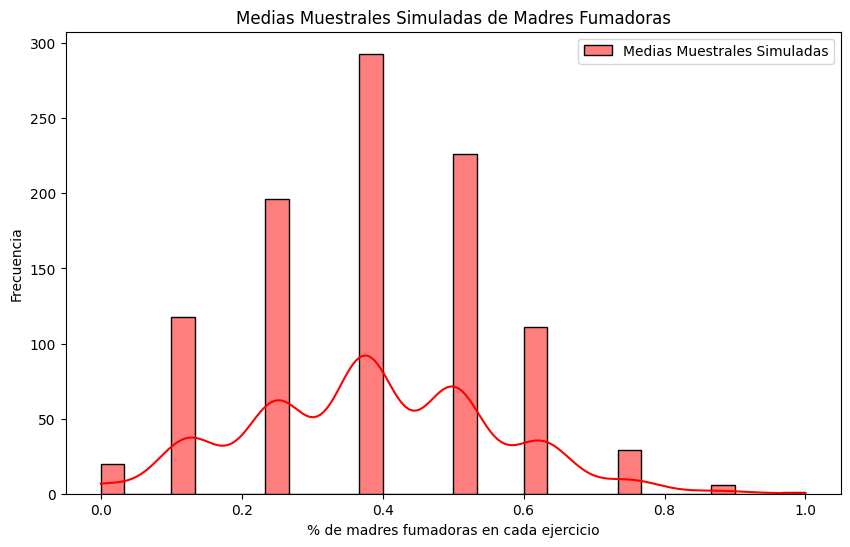

d) Con la extracción de 1000 muestras de tamaño 8, las 10 primeras medias en % de las muestras reales son: [np.float64(0.375), np.float64(0.375), np.float64(0.375), np.float64(0.375), np.float64(0.5), np.float64(0.25), np.float64(0.5), np.float64(0.625), np.float64(0.625), np.float64(0.5)]


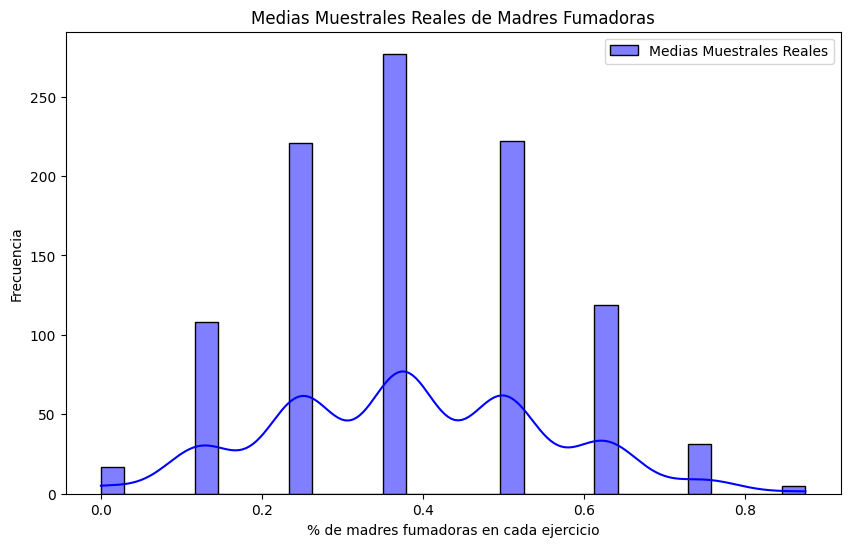

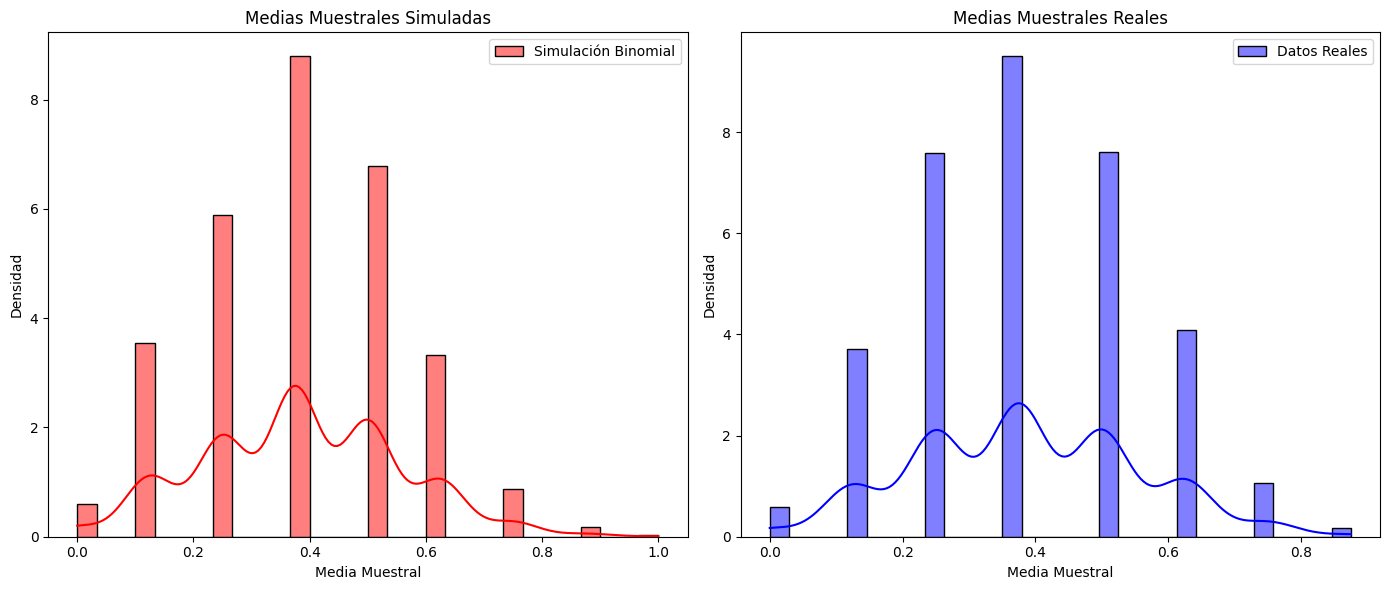


Conclusión:
La probabilidad de que una madre fume es del 39.10%. De acuerdo con el modelo de distribución binomial, al seleccionar 5 madres al azar, se espera que haya aproximadamente 1 madres fumadoras.
Al comparar las medias muestrales de 1000 muestras de tamaño 8, tanto las simuladas como las reales, se observa que ambas distribuciones presentan un comportamiento similar.
Esto refuerza la idea de que la distribución binomial puede modelar adecuadamente el hábito de fumar de las madres en la muestra original.
Además, el Teorema del Límite Central se verifica, ya que las medias muestrales se aproximan a una distribución normal.


In [42]:


# Calcular la probabilidad de que una madre fume
p_fumar = data['Maternal.Smoker'].mean()  # Utilizamos la media para calcular la probabilidad de fumar
print(f"a) Probabilidad de que una madre fume: {p_fumar * 100:.2f}%")

# b) Construir un modelo de distribución binomial para simular el experimento con 5 madres al azar
n = 5  # Número de madres seleccionadas en cada experimento
binomial_model = np.random.binomial(n=n, p=p_fumar, size=1)
print(f"b) De acuerdo con la probabilidad calculada, en el experimento podríamos encontrar {binomial_model[0]} madres fumadoras de {n} seleccionadas.")

# c) Simular 1000 muestras de tamaño 8 y calcular sus medias muestrales
n = 8  # Tamaño de cada muestra
num_simulaciones = 1000  # Número de simulaciones
muestras_binomiales = np.random.binomial(n=n, p=p_fumar, size=num_simulaciones)
medias_muestrales_binomiales = muestras_binomiales / n
print(f"c) En una simulación de 1000 muestras de tamaño 8, las 10 primeras medias en % de las muestras binomiales son: {medias_muestrales_binomiales[:10]}")

# Graficar un histograma para las medias muestrales simuladas
plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales_binomiales, kde=True, color='red', label='Medias Muestrales Simuladas', bins=30)
plt.xlabel('% de madres fumadoras en cada ejercicio')
plt.ylabel('Frecuencia')
plt.title('Medias Muestrales Simuladas de Madres Fumadoras')
plt.legend()
plt.show()

# d) Extraer 1000 muestras reales y calcular sus medias muestrales
medias_muestrales_reales = [data['Maternal.Smoker'].sample(n, replace=True).mean() for _ in range(num_simulaciones)]
print(f"d) Con la extracción de 1000 muestras de tamaño 8, las 10 primeras medias en % de las muestras reales son: {medias_muestrales_reales[:10]}")

# Graficar un histograma para las medias muestrales reales
plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales_reales, kde=True, color='blue', label='Medias Muestrales Reales', bins=30)
plt.xlabel('% de madres fumadoras en cada ejercicio')
plt.ylabel('Frecuencia')
plt.title('Medias Muestrales Reales de Madres Fumadoras')
plt.legend()
plt.show()

# Comparación de ambas distribuciones
plt.figure(figsize=(14, 6))

# Histograma de las medias muestrales simuladas
plt.subplot(1, 2, 1)
sns.histplot(medias_muestrales_binomiales, kde=True, color='red', label='Simulación Binomial', bins=30, stat="density")
plt.title('Medias Muestrales Simuladas')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()

# Histograma de las medias muestrales reales
plt.subplot(1, 2, 2)
sns.histplot(medias_muestrales_reales, kde=True, color='blue', label='Datos Reales', bins=30, stat="density")
plt.title('Medias Muestrales Reales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusión
print("\nConclusión:")
print("La probabilidad de que una madre fume es del {:.2f}%. De acuerdo con el modelo de distribución binomial, al seleccionar 5 madres al azar, se espera que haya aproximadamente {} madres fumadoras.".format(p_fumar * 100, binomial_model[0]))
print("Al comparar las medias muestrales de 1000 muestras de tamaño 8, tanto las simuladas como las reales, se observa que ambas distribuciones presentan un comportamiento similar.")
print("Esto refuerza la idea de que la distribución binomial puede modelar adecuadamente el hábito de fumar de las madres en la muestra original.")
print("Además, el Teorema del Límite Central se verifica, ya que las medias muestrales se aproximan a una distribución normal.")


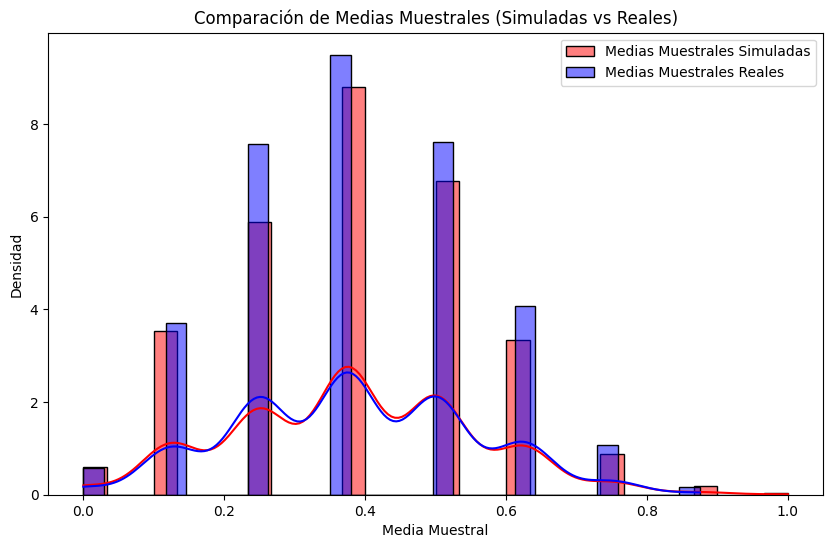

In [43]:
# Comparar ambas distribuciones de las medias muestrales en un solo gráfico
plt.figure(figsize=(10, 6))

# Graficar las medias muestrales simuladas
sns.histplot(medias_muestrales_binomiales, kde=True, color='red', label='Medias Muestrales Simuladas', bins=30, stat="density")

# Graficar las medias muestrales reales
sns.histplot(medias_muestrales_reales, kde=True, color='blue', label='Medias Muestrales Reales', bins=30, stat="density")

plt.title('Comparación de Medias Muestrales (Simuladas vs Reales)')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
plt.show()


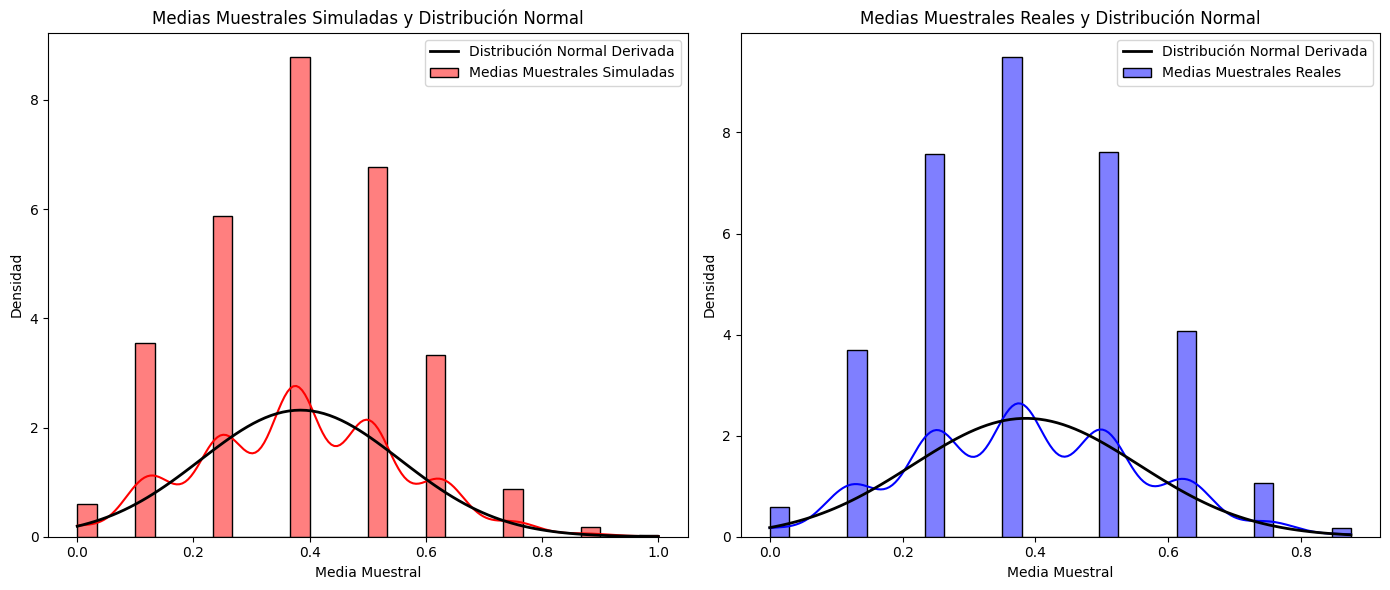

El gráfico muestra la comparación entre las medias muestrales simuladas y reales con la distribución normal derivada del modelo binomial.
A la izquierda, la distribución de las medias muestrales simuladas se asemeja a una distribución normal, lo cual se confirma por la superposición de la curva negra de la distribución normal derivada.
A la derecha, la distribución de las medias muestrales reales también presenta una tendencia hacia la normalidad, aunque con más variabilidad en comparación con las simuladas.
En ambos casos, las curvas de densidad normal (en negro) se ajustan a las distribuciones de las medias muestrales, confirmando así el Teorema del Límite Central.
Esto demuestra que, tanto para las simulaciones como para los datos reales, la distribución de las medias muestrales tiende a ser normal a medida que se incrementa el tamaño de la muestra.


In [46]:

# Parámetros de la distribución normal para las medias muestrales simuladas
mu_simuladas = np.mean(medias_muestrales_binomiales)
sigma_simuladas = np.std(medias_muestrales_binomiales)

# Parámetros de la distribución normal para las medias muestrales reales
mu_reales = np.mean(medias_muestrales_reales)
sigma_reales = np.std(medias_muestrales_reales)

# Crear el rango de valores x para la distribución normal
x_sim = np.linspace(min(medias_muestrales_binomiales), max(medias_muestrales_binomiales), 100)
x_real = np.linspace(min(medias_muestrales_reales), max(medias_muestrales_reales), 100)

# Graficar la verificación del TLC
plt.figure(figsize=(14, 6))

# Medias muestrales simuladas con distribución normal
plt.subplot(1, 2, 1)
sns.histplot(medias_muestrales_binomiales, kde=True, color='red', label='Medias Muestrales Simuladas', bins=30, stat="density")
plt.plot(x_sim, norm.pdf(x_sim, mu_simuladas, sigma_simuladas), 'k', linewidth=2, label='Distribución Normal Derivada')
plt.title('Medias Muestrales Simuladas y Distribución Normal')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()

# Medias muestrales reales con distribución normal
plt.subplot(1, 2, 2)
sns.histplot(medias_muestrales_reales, kde=True, color='blue', label='Medias Muestrales Reales', bins=30, stat="density")
plt.plot(x_real, norm.pdf(x_real, mu_reales, sigma_reales), 'k', linewidth=2, label='Distribución Normal Derivada')
plt.title('Medias Muestrales Reales y Distribución Normal')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

print("El gráfico muestra la comparación entre las medias muestrales simuladas y reales con la distribución normal derivada del modelo binomial.")
print("A la izquierda, la distribución de las medias muestrales simuladas se asemeja a una distribución normal, lo cual se confirma por la superposición de la curva negra de la distribución normal derivada.")
print("A la derecha, la distribución de las medias muestrales reales también presenta una tendencia hacia la normalidad, aunque con más variabilidad en comparación con las simuladas.")
print("En ambos casos, las curvas de densidad normal (en negro) se ajustan a las distribuciones de las medias muestrales, confirmando así el Teorema del Límite Central.")
print("Esto demuestra que, tanto para las simulaciones como para los datos reales, la distribución de las medias muestrales tiende a ser normal a medida que se incrementa el tamaño de la muestra.")



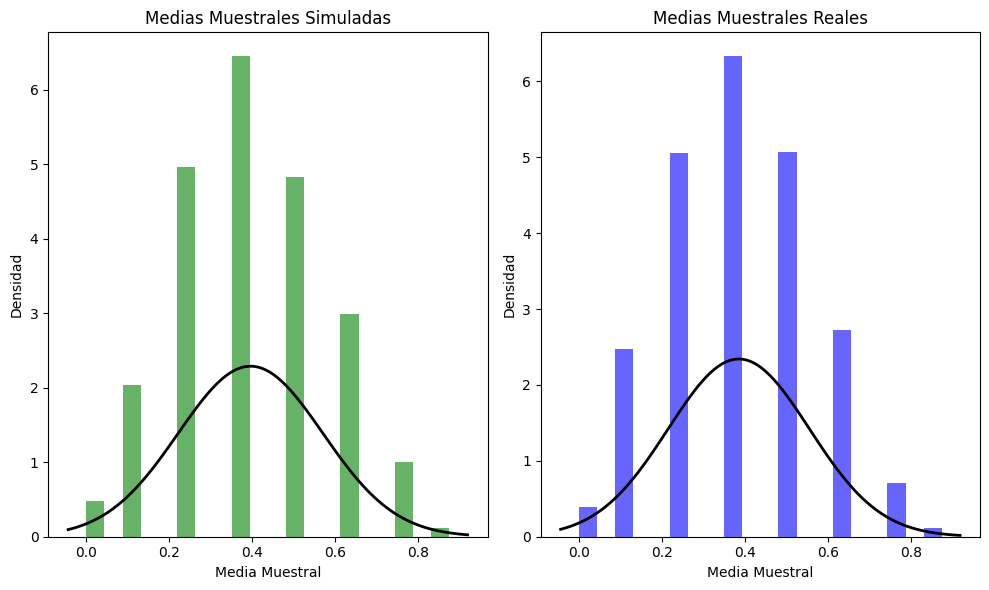

Media muestral simulada: 0.3959, Desviación estándar simulada: 0.1743
Media muestral real: 0.3905, Desviación estándar real: 0.1713
b) Comprobamos que en la medida que aumentamos el número de muestras en casos simulados o reales, la curva de distribución de los datos tiende a ser normal. Ademas sus deviaciones estandar son similares, lo que confirma el Teorema del Límite Central (TLC).


In [51]:
#b) verifica el teorema del límite central, considerando las muestras de datos reales y
#las simuladas con el modelo binomial.

plt.figure(figsize=(10, 6)) #para ver un grafico al lado del otro

# Histograma de las medias muestrales simuladas
plt.subplot(1, 2, 1)
plt.hist(medias_muestrales_simuladas, bins=20, density=True, alpha=0.6, color='g')

# Curva de distribución normal usando la media y desviación estándar de las simulaciones
promedio_medias_simuladas = np.mean(medias_muestrales_simuladas)
desviacion_estandar_simuladas = np.std(medias_muestrales_simuladas)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, promedio_medias_simuladas, desviacion_estandar_simuladas)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Medias Muestrales Simuladas')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')

# Histograma de las medias muestrales reales
plt.subplot(1, 2, 2)
plt.hist(medias_muestrales_reales, bins=20, density=True, alpha=0.6, color='b')

# Curva normal para datos reales
promedio_medias__real = np.mean(medias_muestrales_reales)
desviacion_estandar_real = np.std(medias_muestrales_reales)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, promedio_medias__real, desviacion_estandar_real)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Medias Muestrales Reales')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


# Mostramos los valores estadísticos clave
print(f"Media muestral simulada: {mu_sim:.4f}, Desviación estándar simulada: {sigma_sim:.4f}")
print(f"Media muestral real: {mu_real:.4f}, Desviación estándar real: {sigma_real:.4f}")
print(f"b) Comprobamos que en la medida que aumentamos el número de muestras en casos simulados o reales, la curva de distribución de los datos tiende a ser normal. Ademas sus deviaciones estandar son similares, lo que confirma el Teorema del Límite Central (TLC).")


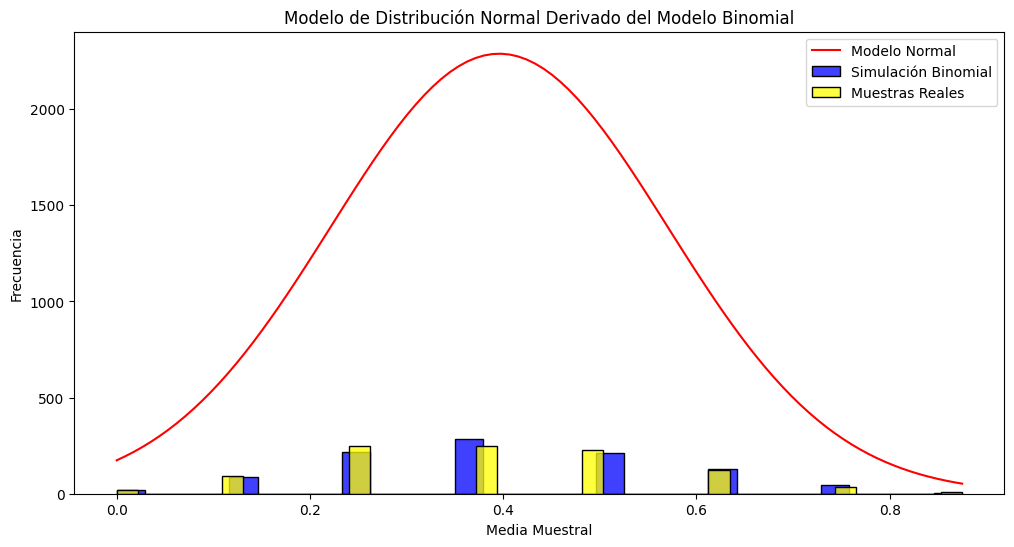

c) Graficamente podemos observar que la probabilidad de seleccionar una madre fumadora al azar se cumple de manera consistente en las simulaciones y en los datos reales, validando el uso del modelo binomial para estimar y predecir este comportamiento en diferentes muestras.
Además, verificamos el Teorema del Límite Central (TLC). A medida que tomamos más muestras, observamos que las medias muestrales de las simulaciones y de los datos reales tienden hacia una distribución normal, independientemente de la distribución original de los datos


In [52]:
# c) Construye un modelo de distribución normal derivado del modelo binomial, y
#grafícalo junto a los anteriores para comparar. Concluye.

# Calcular la media y desviación estándar de las medias muestrales simuladas
media_simulacion_binomial = np.mean(medias_muestrales_simuladas)
std_simulacion_binomial = np.std(medias_muestrales_simuladas)

# Definir un rango de valores x para la distribución normal
x = np.linspace(min(medias_muestrales_simuladas), max(medias_muestrales_simuladas), 100)

# Modelo de distribución normal derivado del modelo binomial
normal_model = stats.norm.pdf(x, media_simulacion_binomial, std_simulacion_binomial)

# Graficar la distribución normal junto a las simulaciones
plt.figure(figsize=(12, 6))

# Graficar las medias muestrales simuladas y reales
sns.histplot(medias_muestrales_simuladas, kde=False, color='blue', label='Simulación Binomial', bins=30)
sns.histplot(media_muestras_reales, kde=False, color='yellow', label='Muestras Reales', bins=40)

# Graficar el modelo normal derivado de las simulaciones binomiales
plt.plot(x, normal_model * len(medias_muestrales_simuladas), label='Modelo Normal', color='red')

plt.title('Modelo de Distribución Normal Derivado del Modelo Binomial')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

print("c) Graficamente podemos observar que la probabilidad de seleccionar una madre fumadora al azar se cumple de manera consistente en las simulaciones y en los datos reales, validando el uso del modelo binomial para estimar y predecir este comportamiento en diferentes muestras.")
print("Además, verificamos el Teorema del Límite Central (TLC). A medida que tomamos más muestras, observamos que las medias muestrales de las simulaciones y de los datos reales tienden hacia una distribución normal, independientemente de la distribución original de los datos")